# Data Importing

Import the required csv file: AADF Data major and minor roads

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('dft_traffic_counts_aadf.csv', error_bad_lines=False, parse_dates = ['year'])
df

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019-01-01,5,85,A560,PA,Major,LA Boundary,M56,...,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019-01-01,3,30,A905,PA,Major,M9,M9 slip,...,35,1787,192,99,72,25,391,216,996,12959
2,3,8024,2019-01-01,9,80,M20,TM,Major,2,2,...,149,9592,1167,192,269,403,3799,1788,7619,55977
3,4,20505,2019-01-01,4,6,A48(M),TM,Major,LA Boundary,29A,...,276,5603,1052,140,230,106,508,1186,3222,47203
4,5,46628,2019-01-01,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,186,7242,629,152,152,37,120,196,1285,55089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019-01-01,6,96,A1201,PA,Major,A1199,A503,...,683,2765,127,15,6,3,1,4,156,15628
489155,489156,6670,2019-01-01,7,123,A132,PA,Major,A13,A1321,...,21,3158,346,81,180,36,177,127,948,18804
489156,489157,7287,2019-01-01,5,75,A572,PA,Major,LA Boundary,A579,...,81,643,67,20,30,1,14,9,141,6534
489157,489158,6584,2019-01-01,5,76,A59,PA,Major,A581,A565,...,79,1309,229,48,54,107,148,107,692,9701


In [2]:
df.isnull().sum()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name        113133
end_junction_road_name          113124
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                  112767
link_length_miles               112767
sequence                        112767
ramp                            362461
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

# Data Cleansing

To estimate the annual millage of different type of vehicle, we will need to below information:
- year
- region_id
- link_length_miles
- AADF for all vehicle types

For the data cleansing part, we will drop the rows for missing data in these columns.

In [3]:
df = df.dropna(subset=['link_length_miles'])
df

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019-01-01,5,85,A560,PA,Major,LA Boundary,M56,...,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019-01-01,3,30,A905,PA,Major,M9,M9 slip,...,35,1787,192,99,72,25,391,216,996,12959
2,3,8024,2019-01-01,9,80,M20,TM,Major,2,2,...,149,9592,1167,192,269,403,3799,1788,7619,55977
3,4,20505,2019-01-01,4,6,A48(M),TM,Major,LA Boundary,29A,...,276,5603,1052,140,230,106,508,1186,3222,47203
4,5,46628,2019-01-01,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,186,7242,629,152,152,37,120,196,1285,55089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019-01-01,6,96,A1201,PA,Major,A1199,A503,...,683,2765,127,15,6,3,1,4,156,15628
489155,489156,6670,2019-01-01,7,123,A132,PA,Major,A13,A1321,...,21,3158,346,81,180,36,177,127,948,18804
489156,489157,7287,2019-01-01,5,75,A572,PA,Major,LA Boundary,A579,...,81,643,67,20,30,1,14,9,141,6534
489157,489158,6584,2019-01-01,5,76,A59,PA,Major,A581,A565,...,79,1309,229,48,54,107,148,107,692,9701


# Basic Analysis

Next up we will create a region by region estimate of the annual millage of different classes of vehicles.
First we will need to calculate the annual millage of different classes of vehicles by:

<b>AADF of each type of vehicle * Link_length _miles * 365 </b>

    
For better visualization, we will just keep the below columns:
- region_id
- year
- road_name
- AADF of each type of vehicle   

In [4]:
df_basic = df

In [5]:
df_basic.iloc[:, 20:] = df_basic.iloc[:, 20:].multiply(df["link_length_miles"], axis="index")*365
df_basic = df_basic.iloc[:,[2,3,20,21,22,23,24,25,26,27,28,29,30,31,32]]
df_basic

C:\Users\Andy\anaconda3\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,year,region_id,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,2019-01-01,5,135911.40,57794.10,14242117.50,248324.10,1757956.80,100345.80,34295.40,15242.4,4445.70,1270.20,5080.80,160680.30,16466237.70
1,2019-01-01,3,496.40,5708.60,2511535.80,8687.00,443533.40,47654.40,24571.80,17870.4,6205.00,97046.20,53611.20,247207.20,3216423.80
2,2019-01-01,9,0.00,215897.50,18108343.50,70700.50,4551404.00,553741.50,91104.00,127640.5,191223.50,1802625.50,848406.00,3615215.50,26561086.50
3,2019-01-01,4,0.00,116858.40,24081721.80,175287.60,3558465.30,668125.20,88914.00,146073.0,67320.60,322630.80,753228.60,2046292.20,29978625.30
4,2019-01-01,5,0.00,17990.85,5229340.40,21045.90,819432.30,71171.35,17198.80,17198.8,4186.55,13578.00,22177.40,145397.75,6233320.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,2019-01-01,6,444544.45,249024.90,5763576.30,341534.15,1382638.25,63506.35,7500.75,3000.3,1500.15,500.05,2000.20,78007.80,7814781.40
489155,2019-01-01,7,12490.30,35748.10,6285635.80,9044.70,1360150.60,149022.20,34886.70,77526.0,15505.20,76233.90,54698.90,408303.60,8098882.80
489156,2019-01-01,5,30579.70,24980.60,2416657.70,34886.70,276940.10,28856.90,8614.00,12921.0,430.70,6029.80,3876.30,60728.70,2814193.80
489157,2019-01-01,5,23243.20,45033.70,5490479.65,57381.65,950792.15,166334.15,34864.80,39222.9,77719.45,107499.80,77719.45,502634.20,7046321.35


In [6]:
annual_mil_region = df_basic.groupby(['region_id', 'year']).sum()
annual_mil_region.iloc[:, 0:] = annual_mil_region.iloc[:, 0:]/1000000
annual_mil_region

pedal_cycles  two_wheeled_motor_vehicles  \
region_id year                                                   
1         2000-01-01     36.921885                  162.041677   
          2001-01-01     34.326013                  173.816756   
          2002-01-01     32.265971                  180.190995   
          2003-01-01     34.403024                  197.158969   
          2004-01-01     30.865517                  184.718660   
...                            ...                         ...   
11        2016-01-01     14.124989                   37.107889   
          2017-01-01     14.214148                   36.447374   
          2018-01-01     14.543286                   36.572967   
          2019-01-01     16.754555                   38.411235   
          2020-01-01     20.114975                   27.470232   

                      cars_and_taxis  buses_and_coaches         lgvs  \
region_id year                                                         
1         2000-01-01    13849.128307         136.614751  1801.174249   
          2001-01-01    14320.200943         137.510545  1842.380245   
          2002-01-01    14670.392579         134.242813  1886.352200   
          2003-01-01    14871.332846         130.466699  1996.272505   
          2004-01-01    14966.038228         119.485827  2094.703296   
...                              ...                ...          ...   
11        2016-01-01     5921.262881          53.273480  1074.181969   
          2017-01-01     6025.822993          50.753243  1098.104599   
          2018-01-01     6092.507234          46.403779  1118.222322   
          2019-01-01     6300.654375          46.623633  1114.435086   
          2020-01-01     4610.665225          29.723209   974.882756   

                      hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
region_id year                                               
1         2000-01-01         506.619000          92.639639   
          2001-01-01         501.380162         100.114748   
          2002-01-01         495.480623          98.141704   
          2003-01-01         477.783259          98.922650   
          2004-01-01         479.368932         101.394982   
...                                 ...                ...   
11        2016-01-01         119.865905          29.532968   
          2017-01-01         116.621212          28.530634   
          2018-01-01         116.549975          27.701989   
          2019-01-01         109.244055          28.297822   
          2020-01-01          93.431590          24.461369   

                      hgvs_4_or_more_rigid_axle  hgvs_3_or_4_articulated_axle  \
region_id year                                                                  
1         2000-01-01                  62.857015                    129.929046   
          2001-01-01                  62.505947                    129.837913   
          2002-01-01                  63.598702                    124.223582   
          2003-01-01                  62.758082                    111.200988   
          2004-01-01                  65.804558                    105.170136   
...                                         ...                           ...   
11        2016-01-01                  39.550834                     16.403407   
          2017-01-01                  42.149481                     18.973554   
          2018-01-01                  43.611083                     19.855573   
          2019-01-01                  44.526040                     17.749567   
          2020-01-01                  39.096632                     14.364757   

                      hgvs_5_articulated_axle  hgvs_6_articulated_axle  \
region_id year                                                           
1         2000-01-01               306.110907               190.732320   
          2001-01-01               301.628569               204.316568   
          2002-01-01               293.864887               221.88027

In [7]:
annual_mil_region

pedal_cycles  two_wheeled_motor_vehicles  \
region_id year                                                   
1         2000-01-01     36.921885                  162.041677   
          2001-01-01     34.326013                  173.816756   
          2002-01-01     32.265971                  180.190995   
          2003-01-01     34.403024                  197.158969   
          2004-01-01     30.865517                  184.718660   
...                            ...                         ...   
11        2016-01-01     14.124989                   37.107889   
          2017-01-01     14.214148                   36.447374   
          2018-01-01     14.543286                   36.572967   
          2019-01-01     16.754555                   38.411235   
          2020-01-01     20.114975                   27.470232   

                      cars_and_taxis  buses_and_coaches         lgvs  \
region_id year                                                         
1         2000-01-01    13849.128307         136.614751  1801.174249   
          2001-01-01    14320.200943         137.510545  1842.380245   
          2002-01-01    14670.392579         134.242813  1886.352200   
          2003-01-01    14871.332846         130.466699  1996.272505   
          2004-01-01    14966.038228         119.485827  2094.703296   
...                              ...                ...          ...   
11        2016-01-01     5921.262881          53.273480  1074.181969   
          2017-01-01     6025.822993          50.753243  1098.104599   
          2018-01-01     6092.507234          46.403779  1118.222322   
          2019-01-01     6300.654375          46.623633  1114.435086   
          2020-01-01     4610.665225          29.723209   974.882756   

                      hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
region_id year                                               
1         2000-01-01         506.619000          92.639639   
          2001-01-01         501.380162         100.114748   
          2002-01-01         495.480623          98.141704   
          2003-01-01         477.783259          98.922650   
          2004-01-01         479.368932         101.394982   
...                                 ...                ...   
11        2016-01-01         119.865905          29.532968   
          2017-01-01         116.621212          28.530634   
          2018-01-01         116.549975          27.701989   
          2019-01-01         109.244055          28.297822   
          2020-01-01          93.431590          24.461369   

                      hgvs_4_or_more_rigid_axle  hgvs_3_or_4_articulated_axle  \
region_id year                                                                  
1         2000-01-01                  62.857015                    129.929046   
          2001-01-01                  62.505947                    129.837913   
          2002-01-01                  63.598702                    124.223582   
          2003-01-01                  62.758082                    111.200988   
          2004-01-01                  65.804558                    105.170136   
...                                         ...                           ...   
11        2016-01-01                  39.550834                     16.403407   
          2017-01-01                  42.149481                     18.973554   
          2018-01-01                  43.611083                     19.855573   
          2019-01-01                  44.526040                     17.749567   
          2020-01-01                  39.096632                     14.364757   

                      hgvs_5_articulated_axle  hgvs_6_articulated_axle  \
region_id year                                                           
1         2000-01-01               306.110907               190.732320   
          2001-01-01               301.628569               204.316568   
          2002-01-01               293.864887               221.88027

In [8]:
annual_mil_region1 = annual_mil_region[['pedal_cycles','two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs','all_motor_vehicles']]
lst = annual_mil_region1.columns.values.tolist()
annual_mil_region1

pedal_cycles  two_wheeled_motor_vehicles  \
region_id year                                                   
1         2000-01-01     36.921885                  162.041677   
          2001-01-01     34.326013                  173.816756   
          2002-01-01     32.265971                  180.190995   
          2003-01-01     34.403024                  197.158969   
          2004-01-01     30.865517                  184.718660   
...                            ...                         ...   
11        2016-01-01     14.124989                   37.107889   
          2017-01-01     14.214148                   36.447374   
          2018-01-01     14.543286                   36.572967   
          2019-01-01     16.754555                   38.411235   
          2020-01-01     20.114975                   27.470232   

                      cars_and_taxis  buses_and_coaches         lgvs  \
region_id year                                                         
1         2000-01-01    13849.128307         136.614751  1801.174249   
          2001-01-01    14320.200943         137.510545  1842.380245   
          2002-01-01    14670.392579         134.242813  1886.352200   
          2003-01-01    14871.332846         130.466699  1996.272505   
          2004-01-01    14966.038228         119.485827  2094.703296   
...                              ...                ...          ...   
11        2016-01-01     5921.262881          53.273480  1074.181969   
          2017-01-01     6025.822993          50.753243  1098.104599   
          2018-01-01     6092.507234          46.403779  1118.222322   
          2019-01-01     6300.654375          46.623633  1114.435086   
          2020-01-01     4610.665225          29.723209   974.882756   

                         all_hgvs  all_motor_vehicles  
region_id year                                         
1         2000-01-01  1288.887927        17237.846912  
          2001-01-01  1299.783907        17773.692396  
          2002-01-01  1297.189768        18168.368356  
          2003-01-01  1270.346007        18465.577026  
          2004-01-01  1299.304063        18664.250074  
...                           ...                 ...  
11        2016-01-01   391.777707         7477.624158  
          2017-01-01   401.338057         7612.451315  
          2018-01-01   409.506286         7703.213912  
          2019-01-01   401.725234         7901.840006  
          2020-01-01   360.879650         6003.577458  

[231 rows x 7 columns]

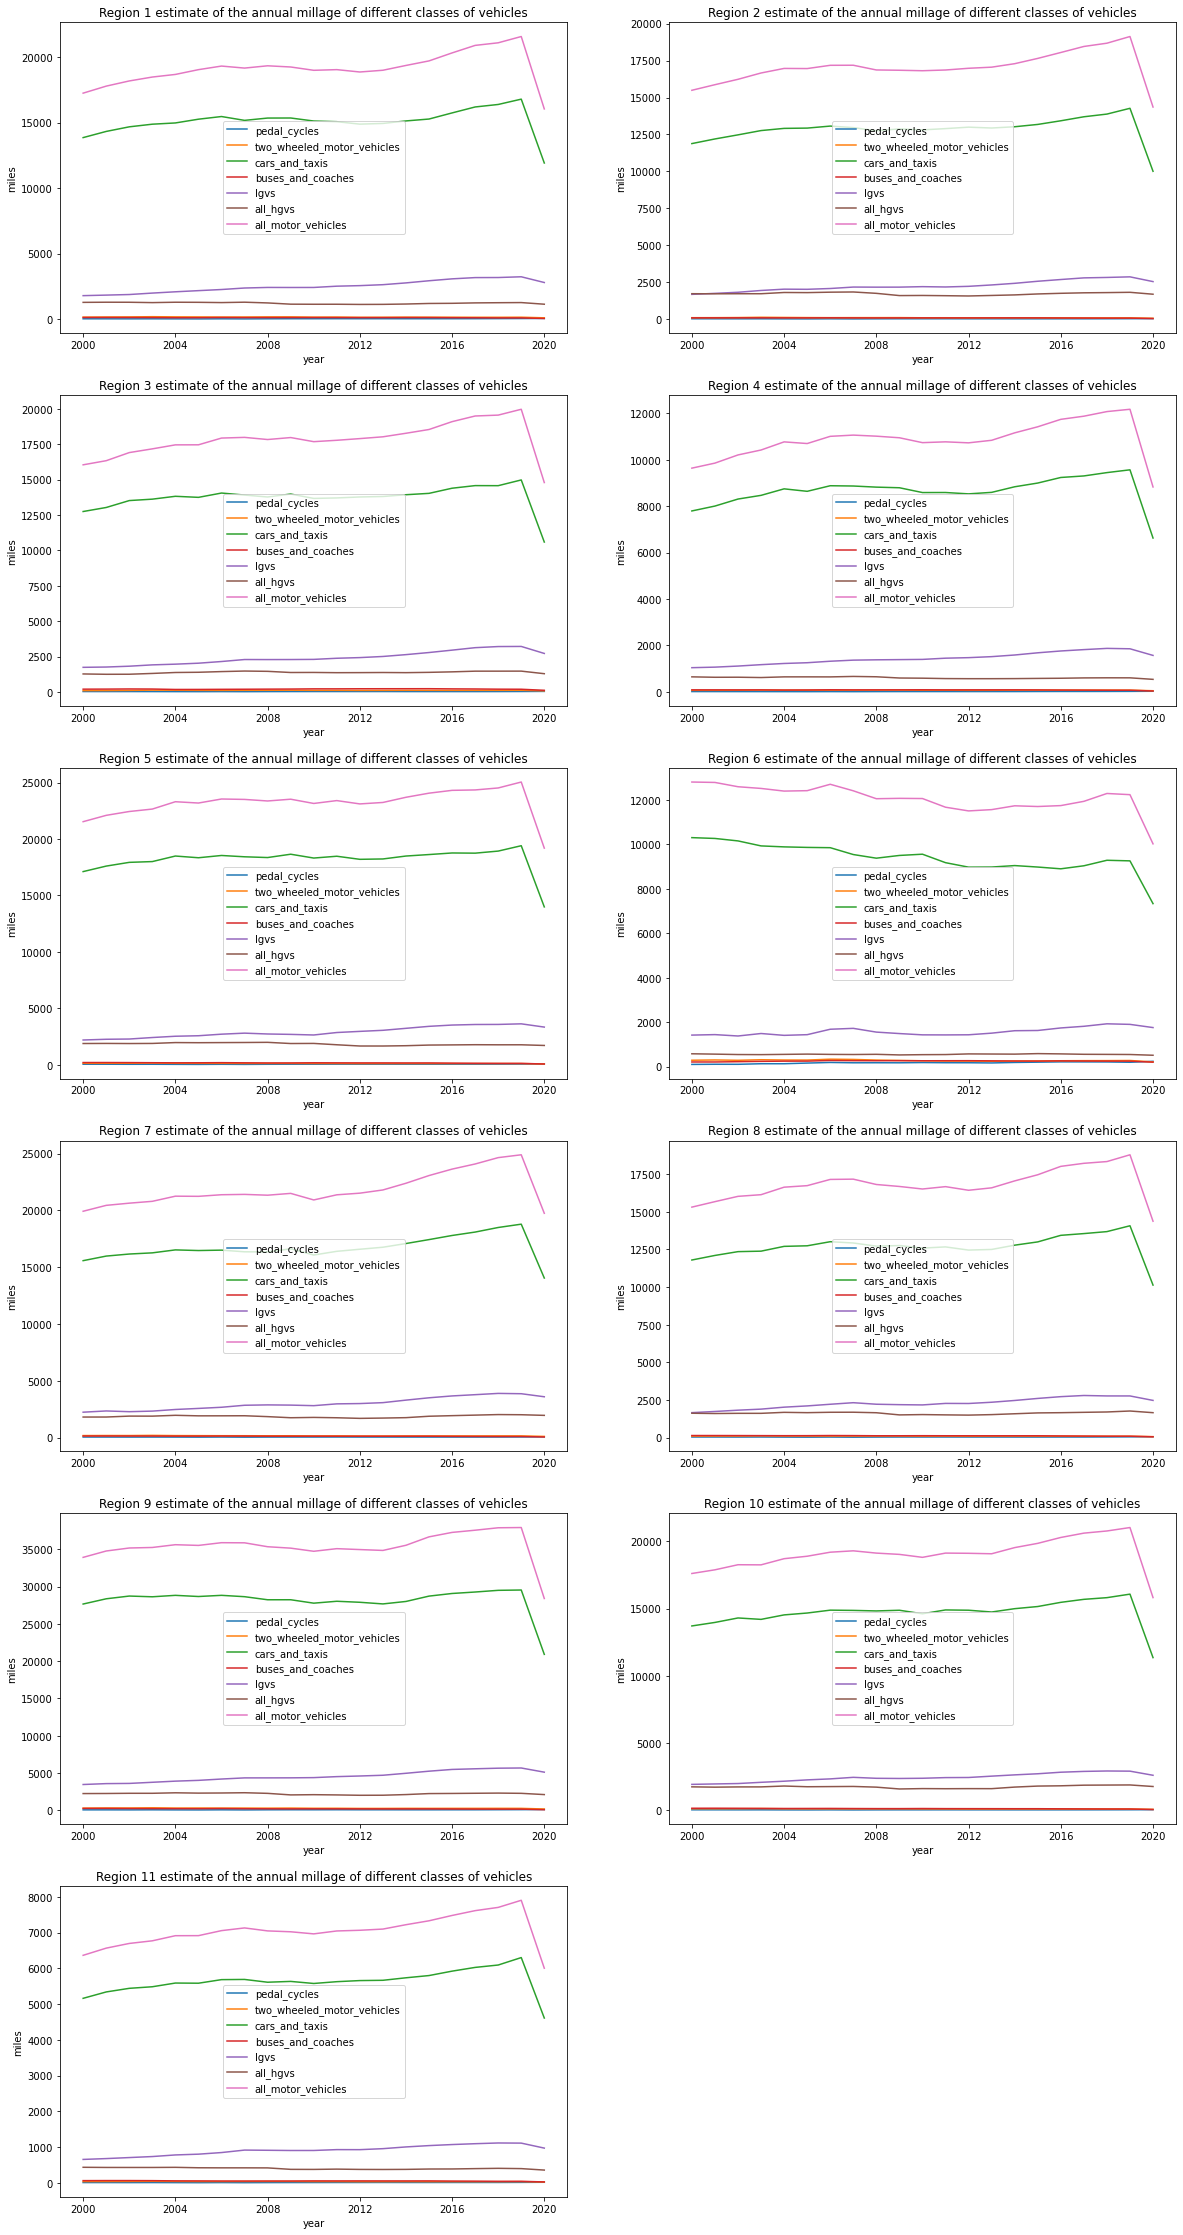

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 40))
for i in range(11):
    plt.subplot(6,2,i+1)
    plt.plot(annual_mil_region1.loc[i+1].index, annual_mil_region1.loc[i+1])
    plt.xlabel('year')
    plt.ylabel('miles')
    plt.legend(lst, loc="center")
    plt.title('Region {number} estimate of the annual millage of different classes of vehicles'.format(number = (i+1)))

plt.savefig("test.png")
plt.show()


In [10]:
ann_miles_year = annual_mil_region.groupby('year').sum()
ann_miles_year

,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
year,,,,,,,,,,,,,
2000-01-01,452.106604,1560.519861,147588.041905,1662.070504,19814.839308,5617.723855,830.740245,775.027229,1554.934339,4014.100720,2455.286168,15247.813008,185873.177660
2001-01-01,447.834768,1626.936557,151171.315970,1674.057703,20415.337749,5493.171379,870.822241,776.523564,1439.276614,3899.766971,2686.197728,15165.759176,190053.301700
2002-01-01,425.216733,1647.414864,154039.306423,1661.962187,20705.531952,5531.548559,863.005547,789.841232,1364.043599,3868.220218,2866.622356,15283.280945,193337.455185
2003-01-01,471.585373,1816.326085,154609.107259,1628.276322,21726.556537,5544.623290,866.003201,809.406914,1292.458945,3804.132149,2986.742546,15303.366706,195083.592040
2004-01-01,426.507117,1664.850790,156990.497141,1550.551496,22598.770633,5672.070618,901.398145,867.080878,1265.969190,3946.307529,3220.790383,15873.616404,198678.237469
2005-01-01,424.676193,1627.033329,156901.056340,1563.268610,23256.095340,5563.019053,886.928279,879.236243,1146.088711,3915.968886,3308.973842,15700.215014,199047.668634
2006-01-01,521.892410,1632.432891,158750.122677,1674.086439,24469.827687,5454.387154,902.211738,903.912893,1087.143006,4020.165695,3437.529116,15805.349621,202331.820736
2007-01-01,435.754918,1631.890633,157352.406474,1594.379864,25618.465846,5341.791323,914.601604,956.210929,1026.150973,4058.966261,3667.709044,15965.429296,202162.572951
2008-01-01,508.022728,1602.115955,156143.615428,1550.462001,25278.602027,5172.599537,926.478427,960.928890,926.046650,3979.622849,3590.699841,15556.376194,200123.057976


In [11]:
df1 = ann_miles_year[['all_motor_vehicles']].iloc[:20,:]
df1

,all_motor_vehicles
year,
2000-01-01,185873.177660
2001-01-01,190053.301700
2002-01-01,193337.455185
2003-01-01,195083.592040
2004-01-01,198678.237469
2005-01-01,199047.668634
2006-01-01,202331.820736
2007-01-01,202162.572951
2008-01-01,200123.057976


In [12]:
df2 = ann_miles_year[['all_motor_vehicles']]
df2

,all_motor_vehicles
year,
2000-01-01,185873.177660
2001-01-01,190053.301700
2002-01-01,193337.455185
2003-01-01,195083.592040
2004-01-01,198678.237469
2005-01-01,199047.668634
2006-01-01,202331.820736
2007-01-01,202162.572951
2008-01-01,200123.057976


# Task2 Regression

In this task you should use the summary data to perform a regression analysis to estimate likely changes in traffic
over the next thirty years. You should identify any potential risks associated with this analysis that may place limits
on how it can be used.

Below is a trend of the all motor traffic in the past 20 years:

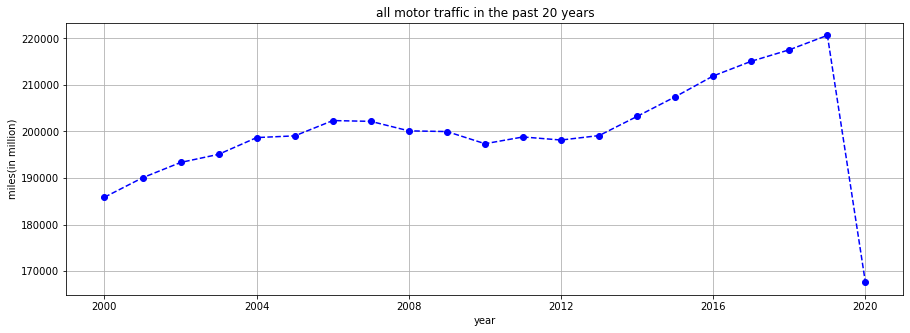

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.xlabel('year')
plt.ylabel('miles(in million)')
plt.title('all motor traffic in the past 20 years')
plt.grid(True)
plt.plot(df2, '--bo')
plt.savefig('overall.png')

In this task, we will need to implement a time-series forcasting model to perform a regression analysis to estimate likely changes in traffic
over the next thirty years. Here we will use Autoregressive integrated moving average (ARIMA) models predict future values based on past values. 


An ARIMA model is characterized by 3 terms: p, d, q. Next we will need to find the value for these 3 parameters.

In [14]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df2.all_motor_vehicles.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.496210
p-value: 0.116399


So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

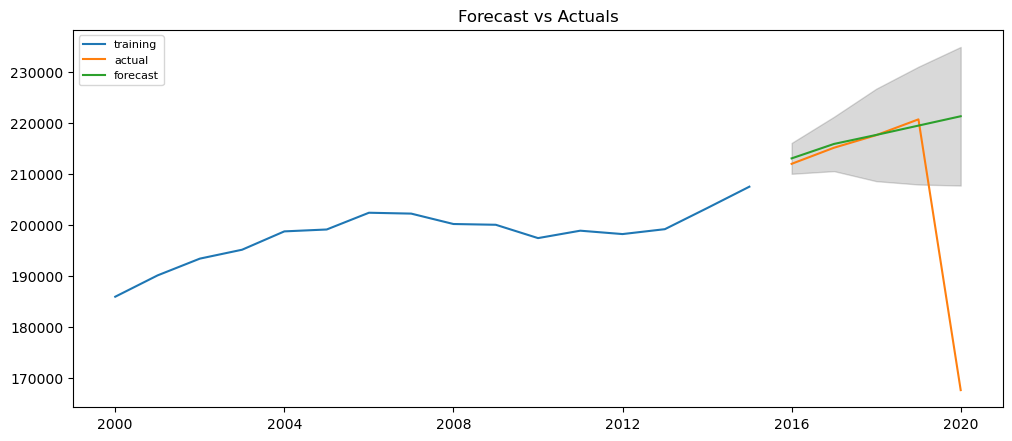

In [15]:

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Create Training and Test
train = df2.all_motor_vehicles[:16]
test = df2.all_motor_vehicles[16:]

model = ARIMA(train, order=(0, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df2.all_motor_vehicles, start_p=0, d=1, start_q=0, max_p=5,
                      max_d=5, max_q=5, start_P=0, start_Q=0, max_P=5, max_D=5,
                      max_Q=5,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True, n_fits=50)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=436.944, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=438.849, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=439.150, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=435.081, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=440.686, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.071 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -216.541
Date:                Fri, 29 Apr 2022   AIC                            435.081
Time:                        00:39:52   BIC                            436.077
Sample:                             0   HQIC                           435.276
                                 - 21                                         
Co

In [17]:
model2 = ARIMA(df2.all_motor_vehicles, order=(0, 1, 2))  
fitted2 = model2.fit(disp=-1)

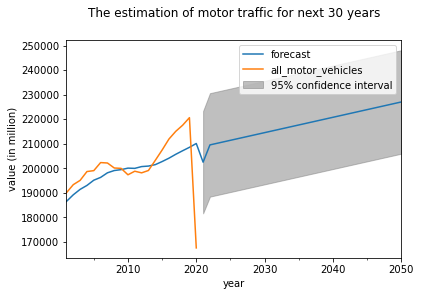

In [18]:
pred = fitted2.plot_predict(1, 50)

plt.title('The estimation of motor traffic for next 30 years', y=1.08)
#plt.figure(figsize=(15,8))
plt.xlabel('year')
plt.ylabel('value (in million)')
plt.savefig('Traffic estimate.png')

# Task 3: Research

Our goal for task 3 is to:

-  estimate the number of electric miles driven each year over the time period
-  estimate how much power generation will be needed to achieve this.

To complete these tasks, there are published estimates that is researched for analysis.
    

In [19]:
df_elec = pd.read_excel('veh0130.xlsx', parse_dates = ['Quarter'])
df_elec

,Quarter,PiG Eligible Cars (Category 1),PiG Eligible Cars (Category 2/3),"Non PiG Eligible Plug-in Cars 2,3",Non Plug-in Cars,Plug-in Quadricycles,All Cars,Unnamed: 7,"PiG Eligible Motorcycles 2,4","Non PiG Eligible Motorcycles 2,4",...,PiG Eligible Light Goods Vehicles 2,Non PiG Eligible Plug-in Light Goods Vehicles 2,Non Plug-in Light Goods Vehicles,All Light Goods Vehicles,Unnamed: 16,Heavy Goods Vehicles,Buses and coaches,Taxis,Other vehicles excl. Taxis 5,Total
0,2010 Q1,98,0,1158,1,222,1479,NaN,0,1266,...,0,3888,1,3889,NaN,1067,70,4,1220,8995
1,2010 Q2,76,20,1160,1,217,1474,NaN,0,1336,...,0,3911,1,3912,NaN,1079,70,4,1245,9120
2,2010 Q3,85,20,1173,1,214,1493,NaN,0,1371,...,0,3752,1,3753,NaN,977,74,3,1248,8919
3,2010 Q4,113,21,1210,1,221,1566,NaN,0,1370,...,0,3748,1,3749,NaN,967,77,2,1260,8991
4,2011 Q1,376,24,1254,1,225,1880,NaN,0,1460,...,0,3765,1,3766,NaN,961,79,2,1281,9429
5,2011 Q2,710,24,1254,1,216,2205,NaN,0,1537,...,0,3718,1,3719,NaN,947,78,2,1300,9788
6,2011 Q3,1015,24,1270,2,214,2525,NaN,0,1502,...,0,3572,0,3572,NaN,892,76,3,1296,9866
7,2011 Q4,1143,28,1259,2,216,2648,NaN,0,1462,...,33,3548,0,3581,NaN,885,76,3,1299,9954
8,2012 Q1,1474,53,1205,3,224,2959,NaN,0,1427,...,70,3536,0,3606,NaN,881,76,3,1318,10270
9,2012 Q2,1680,321,1187,3,371,3562,NaN,0,1370,...,134,3517,10,3661,NaN,843,81,3,1336,10856


To estimate the number of electric miles driven each year, the following steps are applied.

1. calculate the total number of plug-in grant (electric) cars 
2. in proportion to the total number of vehicles in uk
3. Multiplied by the annual miles of all vehicles
4. Applied regression model

In [20]:
column_names = ['PiG Eligible Cars (Category 1)', 'PiG Eligible Cars (Category 2/3)', 'Plug-in Quadricycles'
                , 'PiG Eligible Motorcycles 2,4', 'PiG Eligible Light Goods Vehicles 2', ]
df_elec['Total number of elec vehicles'] = df_elec[column_names].sum(axis=1)
#df_elec['Total number of elec vehicles'] = df_elec['Total number of elec vehicles'].apply(lambda x: x/4)
df_elec['Year'] = df_elec['Quarter'].apply(lambda x: x[0:4])
df_elec

,Quarter,PiG Eligible Cars (Category 1),PiG Eligible Cars (Category 2/3),"Non PiG Eligible Plug-in Cars 2,3",Non Plug-in Cars,Plug-in Quadricycles,All Cars,Unnamed: 7,"PiG Eligible Motorcycles 2,4","Non PiG Eligible Motorcycles 2,4",...,Non Plug-in Light Goods Vehicles,All Light Goods Vehicles,Unnamed: 16,Heavy Goods Vehicles,Buses and coaches,Taxis,Other vehicles excl. Taxis 5,Total,Total number of elec vehicles,Year
0,2010 Q1,98,0,1158,1,222,1479,NaN,0,1266,...,1,3889,NaN,1067,70,4,1220,8995,320,2010
1,2010 Q2,76,20,1160,1,217,1474,NaN,0,1336,...,1,3912,NaN,1079,70,4,1245,9120,313,2010
2,2010 Q3,85,20,1173,1,214,1493,NaN,0,1371,...,1,3753,NaN,977,74,3,1248,8919,319,2010
3,2010 Q4,113,21,1210,1,221,1566,NaN,0,1370,...,1,3749,NaN,967,77,2,1260,8991,355,2010
4,2011 Q1,376,24,1254,1,225,1880,NaN,0,1460,...,1,3766,NaN,961,79,2,1281,9429,625,2011
5,2011 Q2,710,24,1254,1,216,2205,NaN,0,1537,...,1,3719,NaN,947,78,2,1300,9788,950,2011
6,2011 Q3,1015,24,1270,2,214,2525,NaN,0,1502,...,0,3572,NaN,892,76,3,1296,9866,1253,2011
7,2011 Q4,1143,28,1259,2,216,2648,NaN,0,1462,...,0,3581,NaN,885,76,3,1299,9954,1420,2011
8,2012 Q1,1474,53,1205,3,224,2959,NaN,0,1427,...,0,3606,NaN,881,76,3,1318,10270,1821,2012
9,2012 Q2,1680,321,1187,3,371,3562,NaN,0,1370,...,10,3661,NaN,843,81,3,1336,10856,2506,2012


In [21]:
df_elec_year = df_elec.groupby('Year').sum()
df_elec_year
df_elec_year = df_elec_year[['Total number of elec vehicles']]
df_elec_year['Total number of elec vehicles'] = df_elec_year['Total number of elec vehicles'].apply(lambda x: x/4)
df_elec_year

,Total number of elec vehicles
Year,
2010,326.75
2011,1062.00
2012,2933.25
2013,6239.75
2014,14823.75
2015,37849.75
2016,69677.75
2017,108634.75
2018,154424.00


In [22]:
df_total = pd.read_excel('veh0101.xlsx', parse_dates = ['Quarter'])
df_total = df_total.loc[64:,:]
df_total = df_total.reset_index(drop=True)
df_total['Year'] = df_total['Quarter'].apply(lambda x: x[0:4])
df_total['Total'] = df_total['Cars'].apply(lambda x: x*100)
df_total = df_total[['Year', 'Total']]


In [23]:
df_total = df_total.groupby('Year').sum()
df_total['Total'] = df_total['Total'].apply(lambda x: x/4)

In [24]:
df_com = pd.concat([df_elec_year, df_total], axis=1)
df_com = df_com.iloc[:11,:]
df_com['Percentage'] = df_com.apply(lambda x: (x['Total number of elec vehicles']/x['Total'])*100, axis=1)
df_com

,Total number of elec vehicles,Total,Percentage
Year,,,
2010,326.75,2845180.0,0.011484
2011,1062.00,2854127.5,0.037209
2012,2933.25,2870675.0,0.102180
2013,6239.75,2906732.5,0.214665
2014,14823.75,2960400.0,0.500735
2015,37849.75,3007022.5,1.258712
2016,69677.75,3071790.0,2.268311
2017,108634.75,3120637.5,3.481172
2018,154424.00,3149132.5,4.903700


In [25]:
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df2_up = df2.iloc[10:,:]
df2_up['year'] = year
df2_up = df2_up.set_index('year')
df_com1 = pd.concat([df_com, df2_up], axis=1)
df_com1['all_motor_vehicles'] = df_com1['all_motor_vehicles'].apply(lambda x: round(x,2))
df_com1['Percentage'] = df_com1['Percentage'].apply(lambda x: round(x,2))
#df_com1['elec_miles_annual'] = df_com1.apply(lambda x: x['all_motor_vehicles']*x['Percentage'], axis = 1)
df_com1['elec_miles_annual'] = df_com1['all_motor_vehicles']*df_com1['Percentage']
df_com1['elec_miles_annual'] = df_com1['elec_miles_annual']/100
df_com1['elec_miles_annual'] = df_com1['elec_miles_annual'].apply(lambda x: round(x,2))
df_com1

,Total number of elec vehicles,Total,Percentage,all_motor_vehicles,elec_miles_annual
2010,326.75,2845180.0,0.01,197359.94,19.74
2011,1062.00,2854127.5,0.04,198812.98,79.53
2012,2933.25,2870675.0,0.10,198150.08,198.15
2013,6239.75,2906732.5,0.21,199110.65,418.13
2014,14823.75,2960400.0,0.50,203238.16,1016.19
2015,37849.75,3007022.5,1.26,207438.99,2613.73
2016,69677.75,3071790.0,2.27,211917.82,4810.53
2017,108634.75,3120637.5,3.48,215073.45,7484.56
2018,154424.00,3149132.5,4.90,217535.50,10659.24
2019,188266.75,3184860.0,5.91,220635.41,13039.55


In [26]:
## UK charge point network between the end of 2016 and 2021
### https://www.zap-map.com/statistics/

uk_charge = [0, 0, 0, 0, 0, 6500, 7900, 10456, 16750, 21000, 28000]
df_com1['uk_charger'] = uk_charge
df_com1

,Total number of elec vehicles,Total,Percentage,all_motor_vehicles,elec_miles_annual,uk_charger
2010,326.75,2845180.0,0.01,197359.94,19.74,0
2011,1062.00,2854127.5,0.04,198812.98,79.53,0
2012,2933.25,2870675.0,0.10,198150.08,198.15,0
2013,6239.75,2906732.5,0.21,199110.65,418.13,0
2014,14823.75,2960400.0,0.50,203238.16,1016.19,0
2015,37849.75,3007022.5,1.26,207438.99,2613.73,6500
2016,69677.75,3071790.0,2.27,211917.82,4810.53,7900
2017,108634.75,3120637.5,3.48,215073.45,7484.56,10456
2018,154424.00,3149132.5,4.90,217535.50,10659.24,16750
2019,188266.75,3184860.0,5.91,220635.41,13039.55,21000


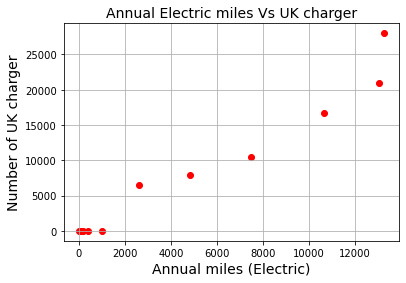

In [27]:
plt.scatter(df_com1['elec_miles_annual'], df_com1['uk_charger'], color='red')
plt.title('Annual Electric miles Vs UK charger', fontsize=14)
plt.xlabel('Annual miles (Electric)', fontsize=14)
plt.ylabel('Number of UK charger', fontsize=14)
plt.grid(True)
plt.show()

In [28]:
model3 = ARIMA(df_com1.elec_miles_annual, order=(0, 1, 2))  
fitted3 = model3.fit(disp=-1)

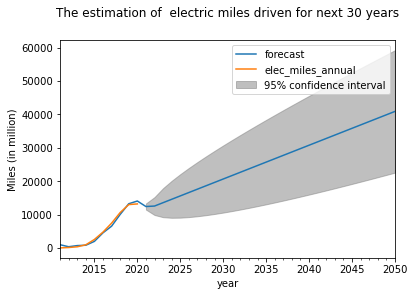

In [29]:
pred = fitted3.plot_predict(1, 40)
plt.title('The estimation of  electric miles driven for next 30 years', y=1.08)
#plt.figure(figsize=(15,8))
plt.xlabel('year')
plt.ylabel('Miles (in million)')
plt.savefig('Elec miles estimate.png')

Text(0.5, 1.0, 'Annual electric miles in the past 10 years')

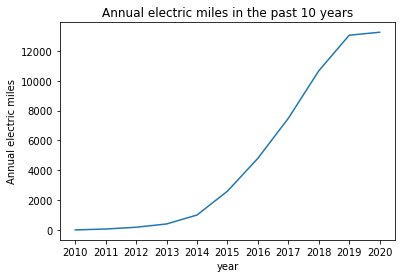

In [30]:
plt.plot(df_com1.index, df_com1['elec_miles_annual'])
plt.xlabel('year')
plt.ylabel('Annual electric miles')
plt.title('Annual electric miles in the past 10 years')


Text(0.5, 1.0, 'Number of UK charger in the past 10 years')

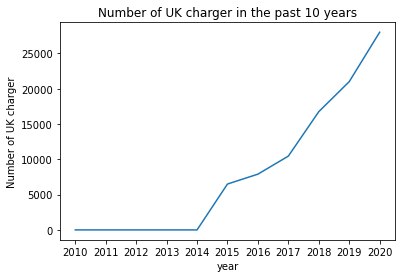

In [31]:
plt.plot(df_com1.index, df_com1['uk_charger'])
plt.xlabel('year')
plt.ylabel('Number of UK charger')
plt.title('Number of UK charger in the past 10 years')

# Power generation estimates

From the reference of:
https://ev-database.uk/cheatsheet/energy-consumption-electric-car

We can see the average energy consumption of the electric vehicle is = 	314 Wh/mi

In [36]:
df_com1['Energy_consumption (TWh)'] = df_com1['elec_miles_annual']*(10**6)*314/10**12
df_com1[['Energy_consumption (TWh)', 'elec_miles_annual']]

,Energy_consumption (TWh),elec_miles_annual
2010,0.006198,19.74
2011,0.024972,79.53
2012,0.062219,198.15
2013,0.131293,418.13
2014,0.319084,1016.19
2015,0.820711,2613.73
2016,1.510506,4810.53
2017,2.350152,7484.56
2018,3.347001,10659.24
2019,4.094419,13039.55


In [37]:
df_com1['Energy_consumption'] = df_com1['Energy_consumption (TWh)']

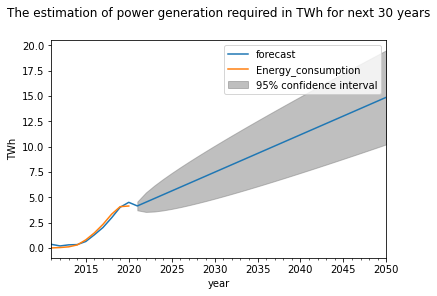

In [39]:
model4 = ARIMA(df_com1.Energy_consumption, order=(0, 1, 1))  
fitted4 = model4.fit(disp=-1)
pred = fitted4.plot_predict(1, 40)
plt.title('The estimation of power generation required in TWh for next 30 years', y=1.08)
plt.xlabel('year')
plt.ylabel('TWh')
plt.savefig('Output.png')